In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = "/content/drive/MyDrive/Colab Notebooks/cumulative_2023.05.29_00.24.25.csv"
df = pd.read_csv(file)

Data set source:
https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=koi

## Data Exploration and Cleaning

### Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2743 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_vet_stat       9564 non-null   object 
 6   koi_vet_date       9564 non-null   object 
 7   koi_pdisposition   9564 non-null   object 
 8   koi_score          8054 non-null   float64
 9   koi_fpflag_nt      9564 non-null   int64  
 10  koi_fpflag_ss      9564 non-null   int64  
 11  koi_fpflag_co      9564 non-null   int64  
 12  koi_fpflag_ec      9564 non-null   int64  
 13  koi_disp_prov      9564 non-null   object 
 14  koi_comment        8355 non-null   object 
 15  koi_period         9564 non-null   float64
 16  koi_time0bk        9564 

In [ ]:
df_clean = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_tce_delivname",
                            "ra", "dec", "koi_pdisposition", "koi_score", "koi_fpflag_nt", "koi_fpflag_co",
                            "koi_fpflag_ec", "koi_fpflag_ss", "koi_longp", "koi_ingress",
                        "koi_sage", "koi_model_dof", "koi_model_chisq", "koi_vet_stat", "koi_comment",
                            "koi_vet_date", "koi_disp_prov", "koi_time0", "koi_time0bk",
                            "koi_fittype", "koi_quarters", "koi_limbdark_mod", "koi_parm_prov",
                            "koi_trans_mod", "koi_model_dof", "koi_sparprov", "koi_datalink_dvs",
                            "koi_datalink_dvr", "koi_count", "koi_eccen"])

In [ ]:
df_clean

,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,CONFIRMED,9.488036,0.146,2.95750,615.8,0.022344,3.20796,2.26,0.0853,89.66,...,0.430,0.940,-0.000200,-0.000550,-0.010,0.200,0.200,0.080,0.310,0.320
1,CONFIRMED,54.418383,0.586,4.50700,874.8,0.027954,3.02368,2.83,0.2734,89.57,...,-0.630,1.230,0.000660,-0.001050,0.390,0.000,0.390,0.490,0.120,0.500
2,CANDIDATE,19.899140,0.969,1.78220,10829.0,0.154046,7.29555,14.60,0.1419,88.96,...,-0.021,-0.038,0.000700,0.000600,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,0.387394,0.22080,33.46,0.0267,67.09,...,-0.111,0.002,0.003020,-0.001420,-0.249,0.147,0.289,-0.257,0.099,0.276
4,CONFIRMED,2.525592,0.701,1.65450,603.3,0.024064,1.98635,2.75,0.0374,85.41,...,-0.010,0.230,0.000080,-0.000070,0.030,-0.090,0.100,0.070,0.020,0.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0.527699,1.252,3.22210,1579.2,0.297633,0.16318,29.35,0.0128,20.78,...,0.792,-0.484,-0.000237,0.000178,2.132,-1.757,2.763,2.344,-1.756,2.929
9560,CANDIDATE,1.739849,0.043,3.11400,48.5,0.006379,0.50770,0.72,0.0290,89.42,...,0.100,2.000,-0.000018,-0.000074,0.740,-0.250,0.780,0.500,-0.180,0.530
9561,FALSE POSITIVE,0.681402,0.147,0.86500,103.6,0.009444,8.97692,1.07,0.0157,88.60,...,7.200,-5.600,-0.000720,0.000500,3.410,-3.650,5.000,3.380,-3.890,5.160
9562,CANDIDATE,333.486169,0.214,3.19900,639.1,0.022590,85.88623,19.30,1.2233,89.98,...,0.310,0.010,-0.000290,-0.000100,1.061,1.320,1.690,1.450,1.370,2.000


In [ ]:
df_clean = df_clean.dropna()
df_clean = df_clean.reset_index(drop=True)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6682 entries, 0 to 6681
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_disposition   6682 non-null   object 
 1   koi_period        6682 non-null   float64
 2   koi_impact        6682 non-null   float64
 3   koi_duration      6682 non-null   float64
 4   koi_depth         6682 non-null   float64
 5   koi_ror           6682 non-null   float64
 6   koi_srho          6682 non-null   float64
 7   koi_prad          6682 non-null   float64
 8   koi_sma           6682 non-null   float64
 9   koi_incl          6682 non-null   float64
 10  koi_teq           6682 non-null   float64
 11  koi_insol         6682 non-null   float64
 12  koi_dor           6682 non-null   float64
 13  koi_ldm_coeff4    6682 non-null   float64
 14  koi_ldm_coeff3    6682 non-null   float64
 15  koi_ldm_coeff2    6682 non-null   float64
 16  koi_ldm_coeff1    6682 non-null   float64


### Data Exploration

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-19-926e49ffa283>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


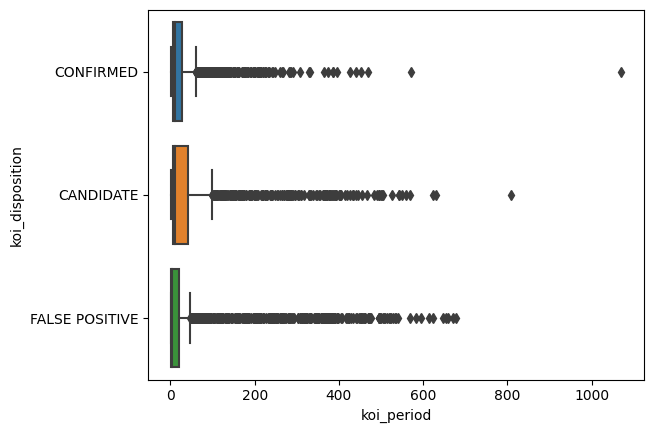

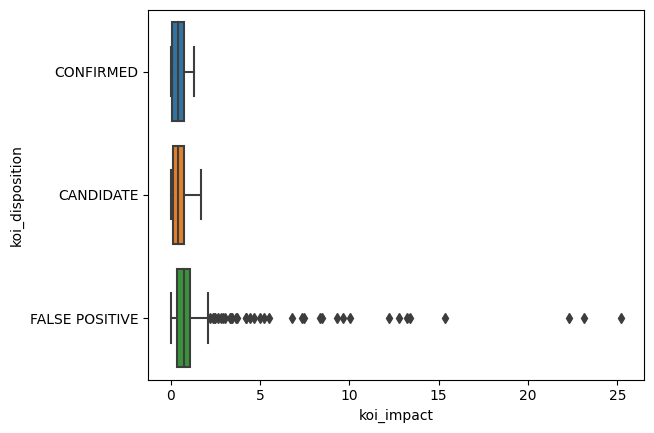

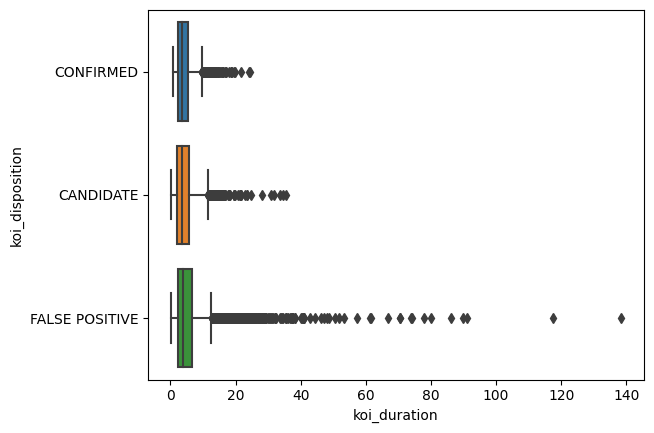

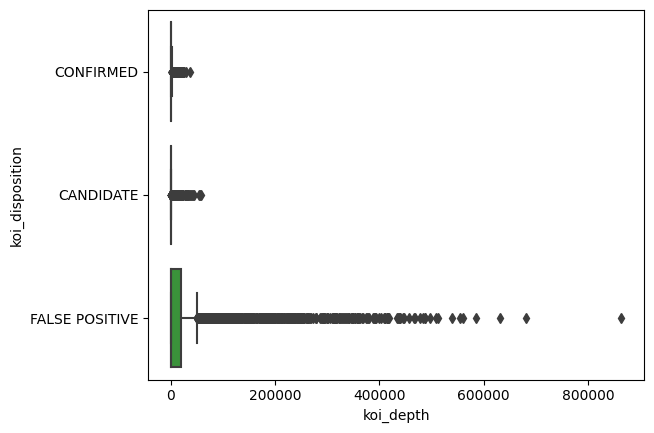

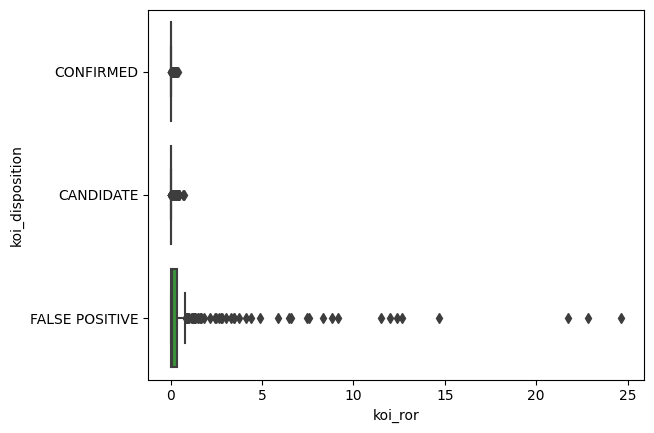

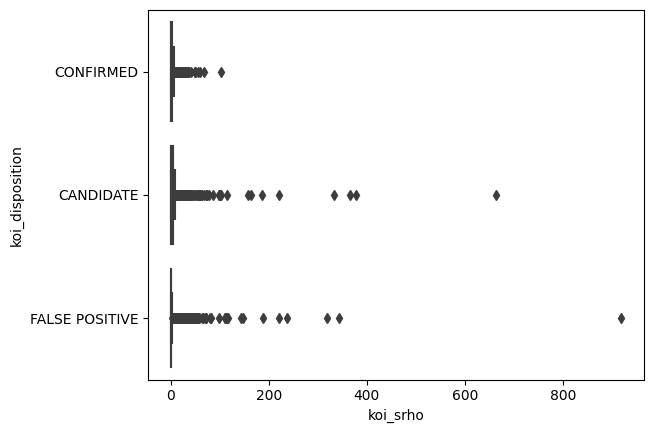

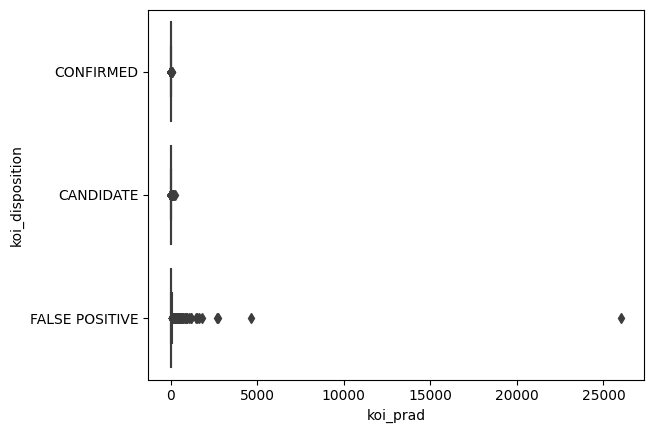

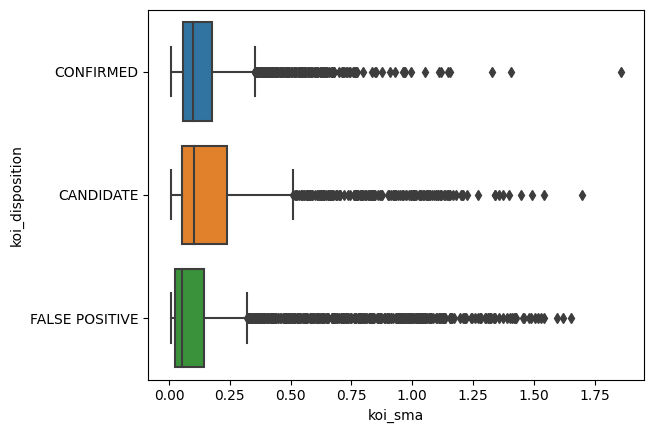

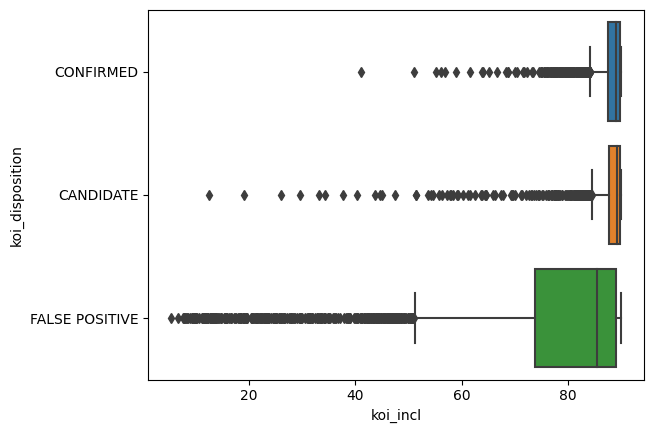

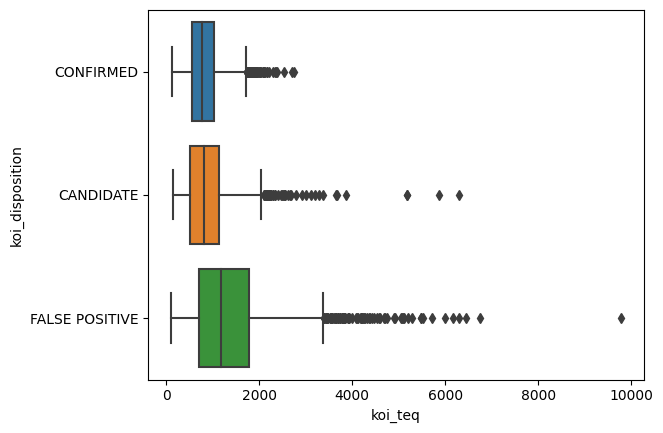

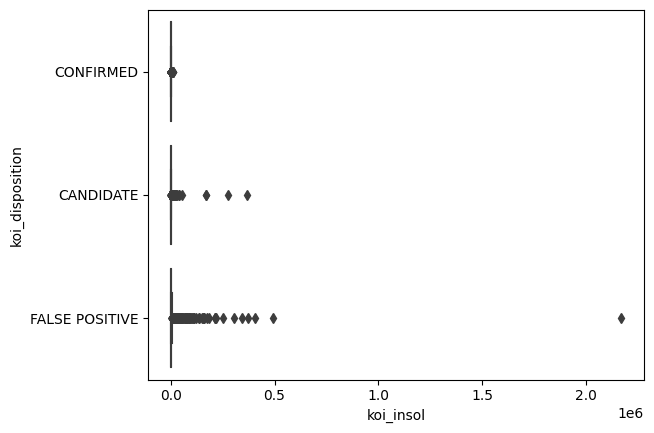

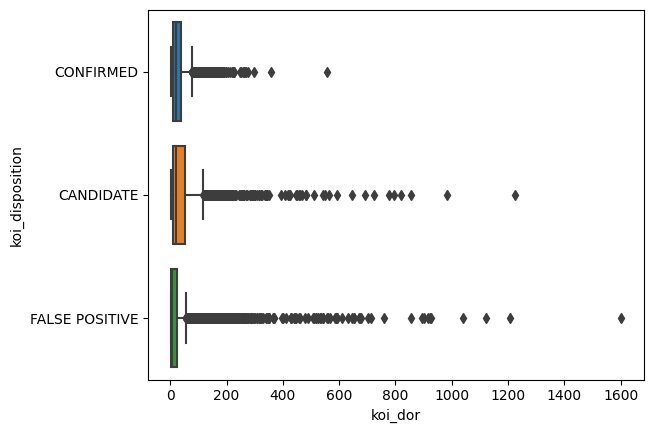

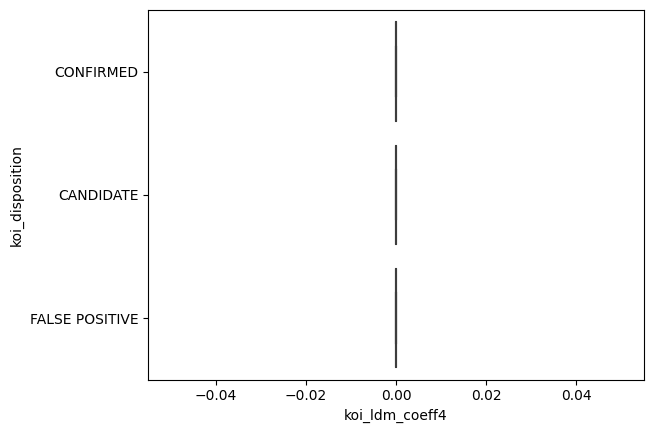

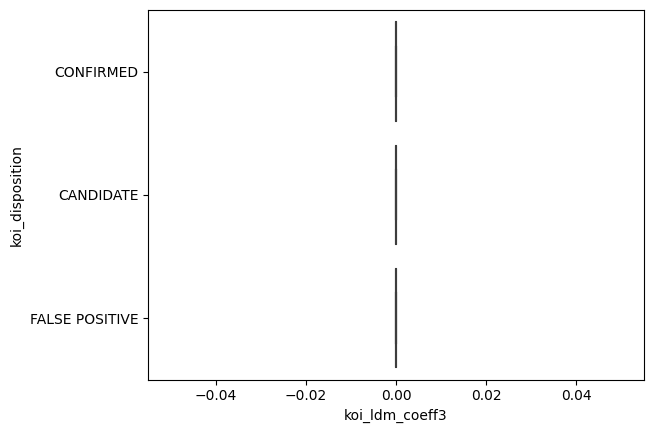

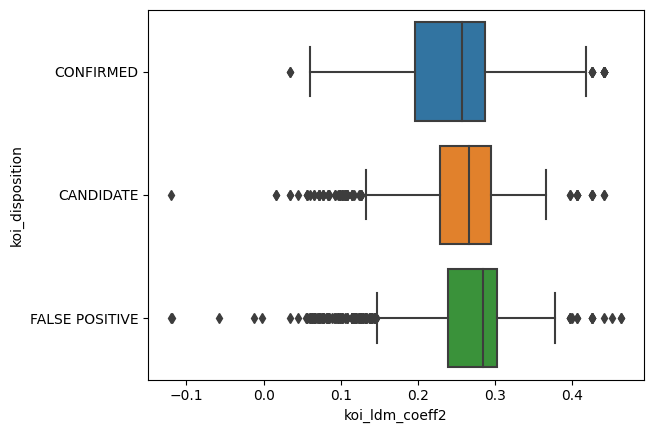

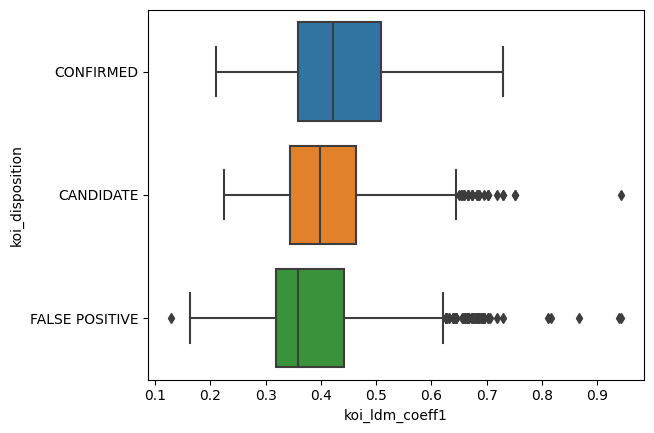

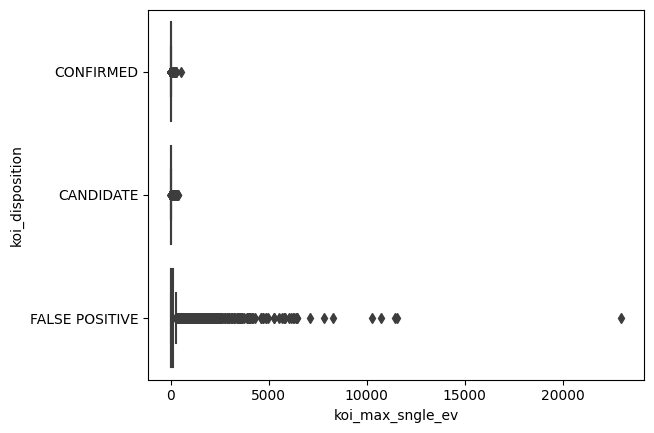

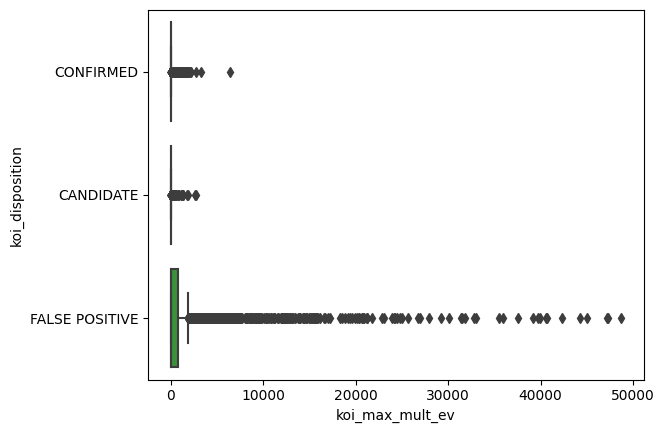

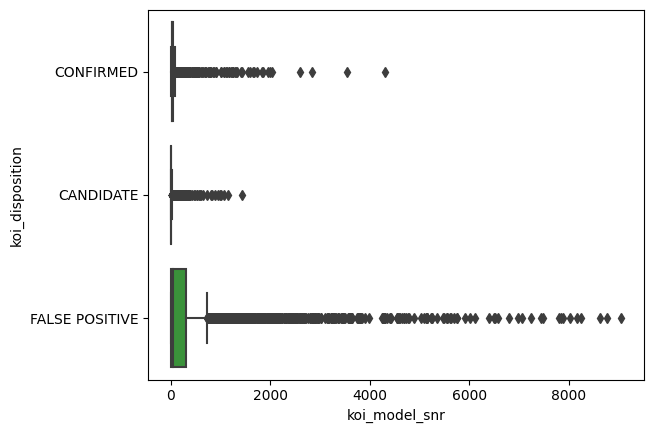

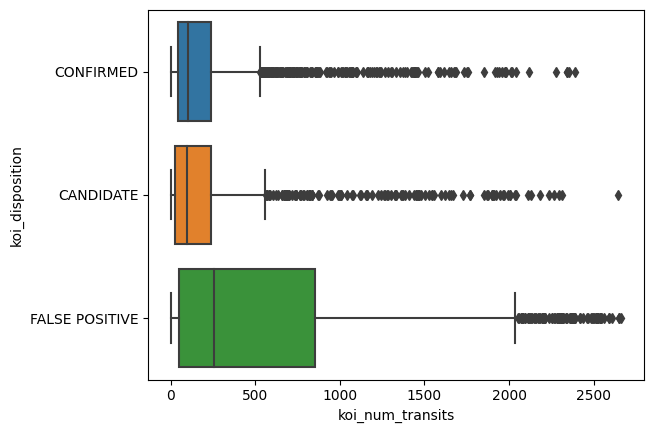

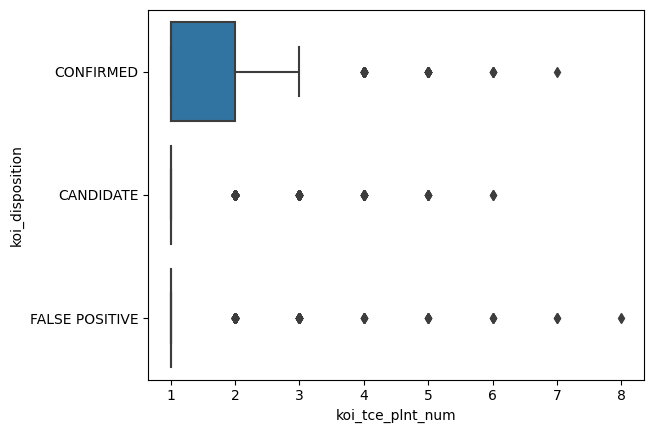

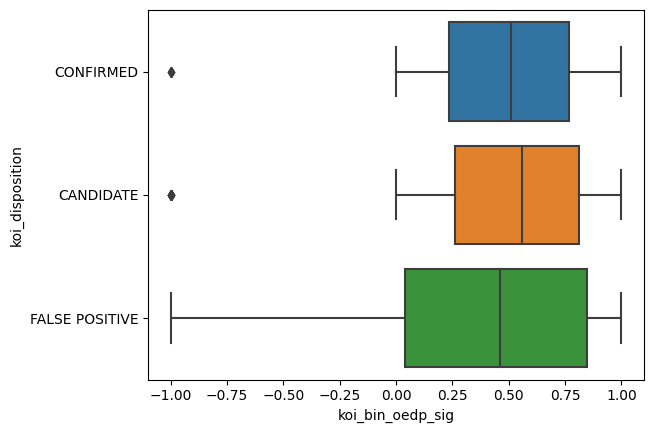

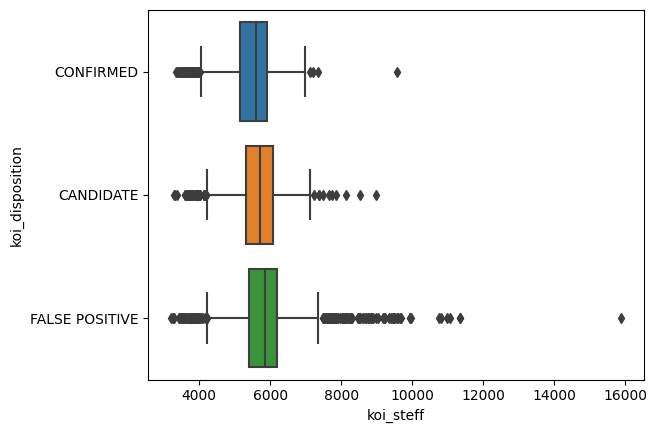

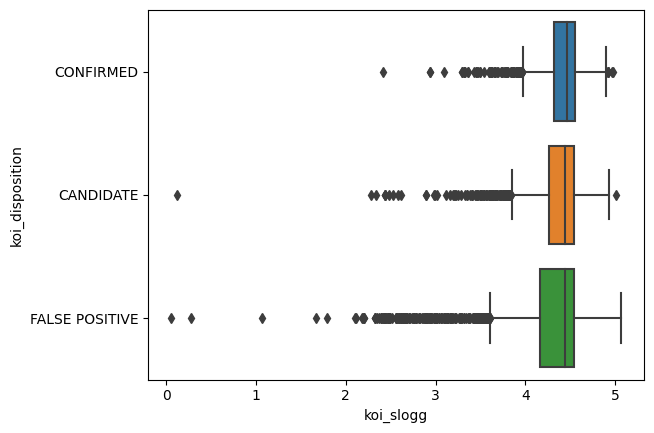

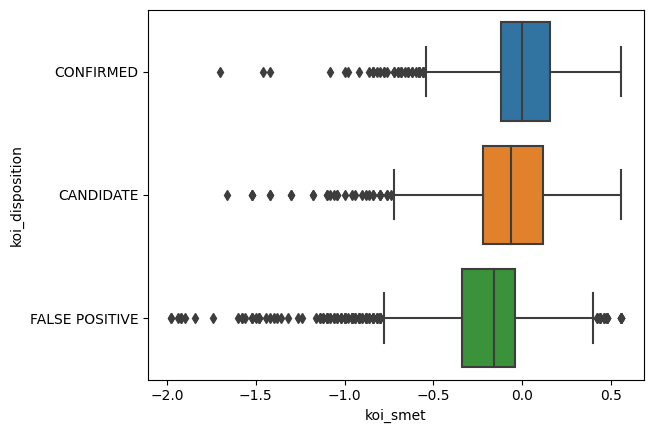

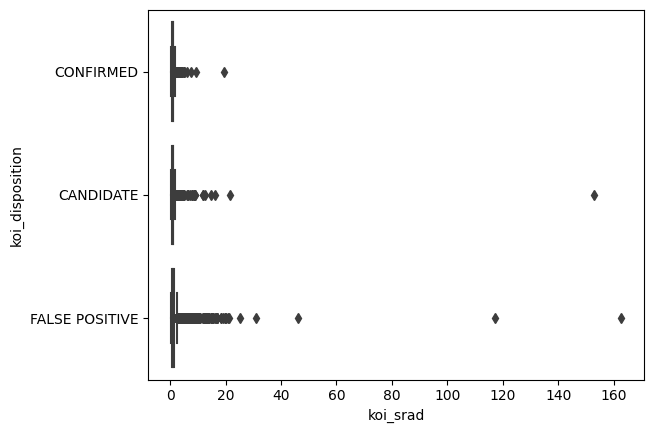

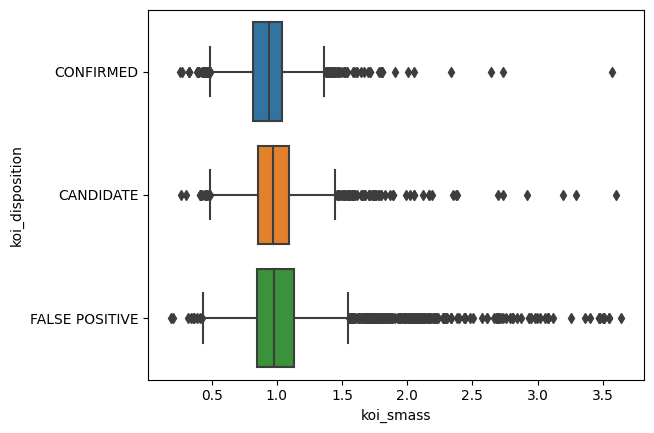

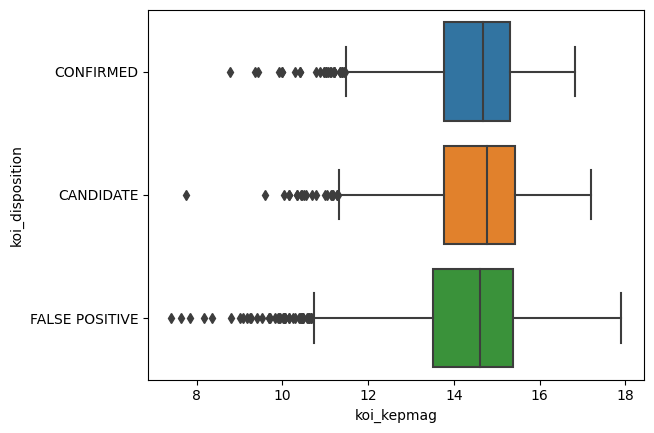

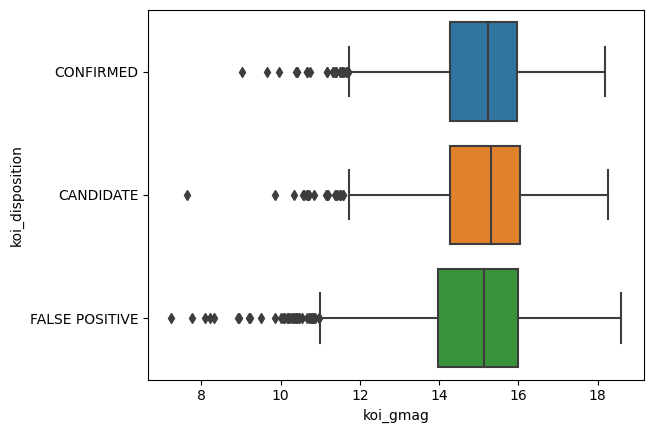

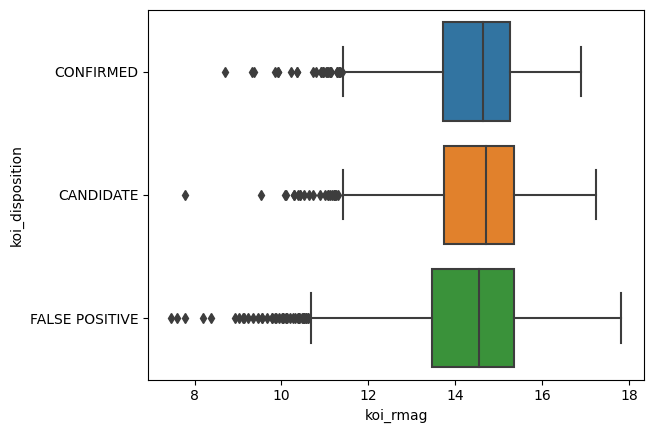

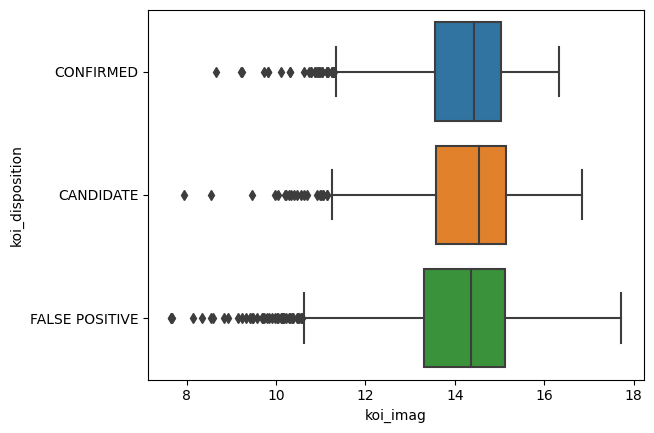

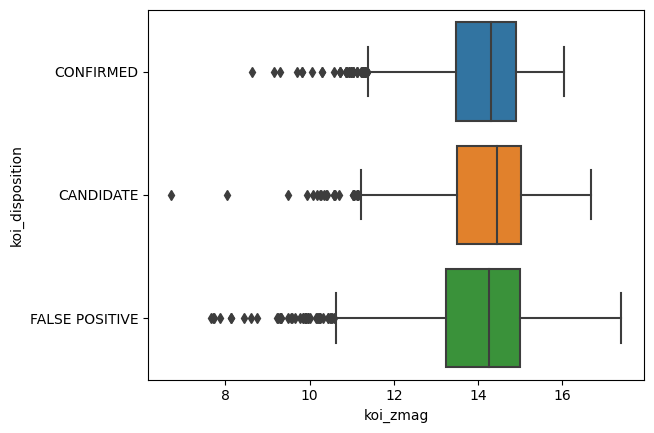

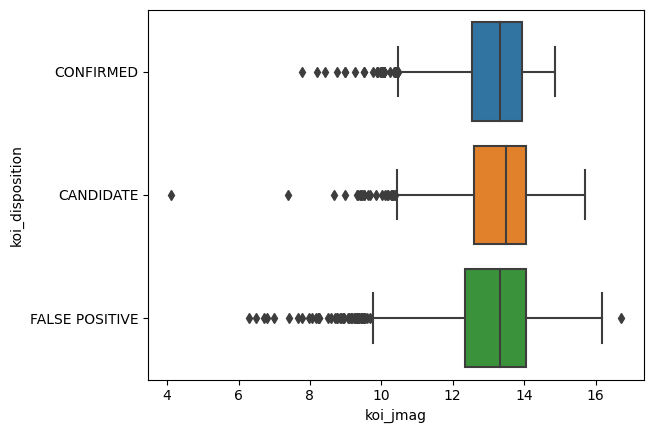

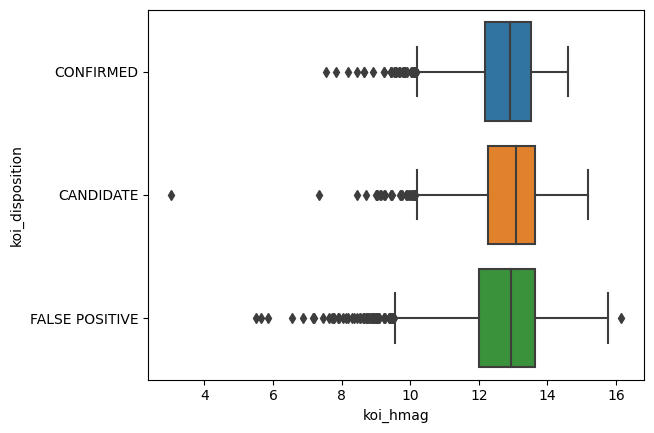

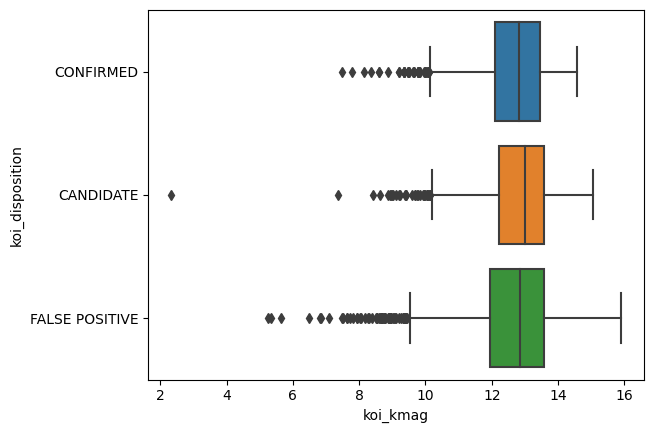

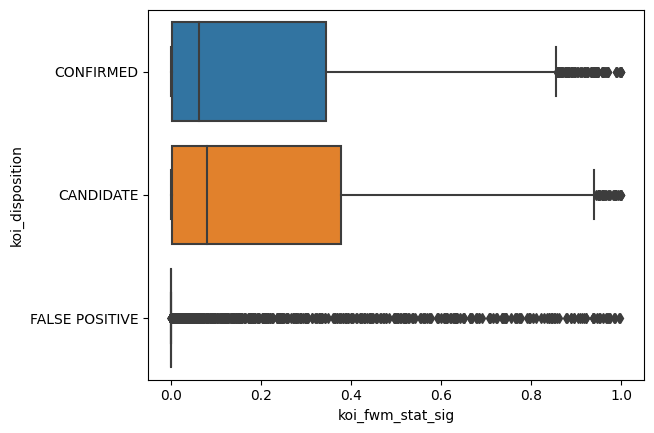

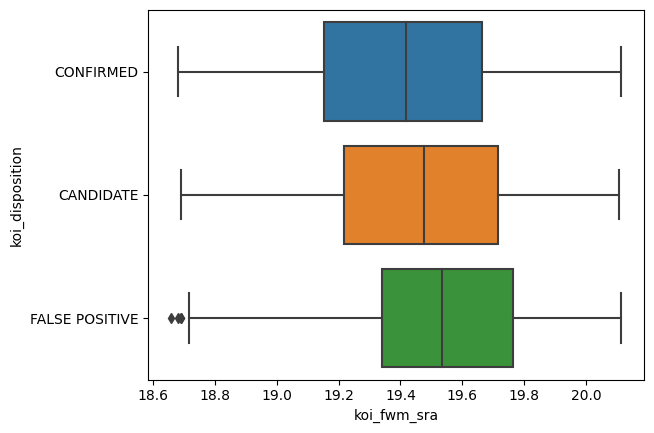

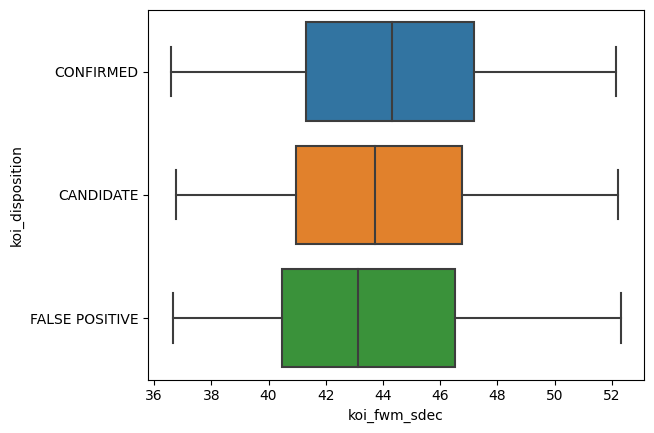

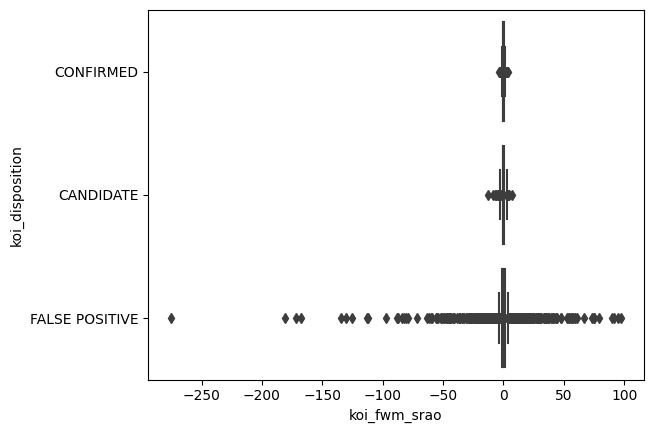

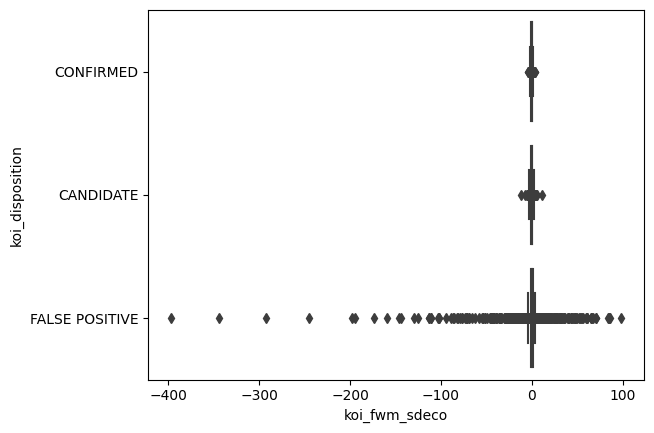

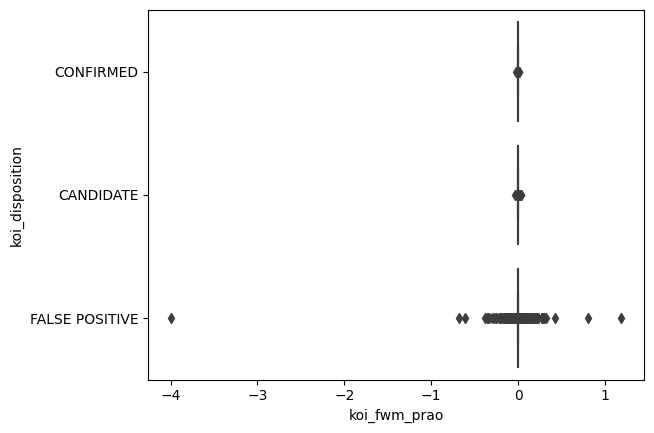

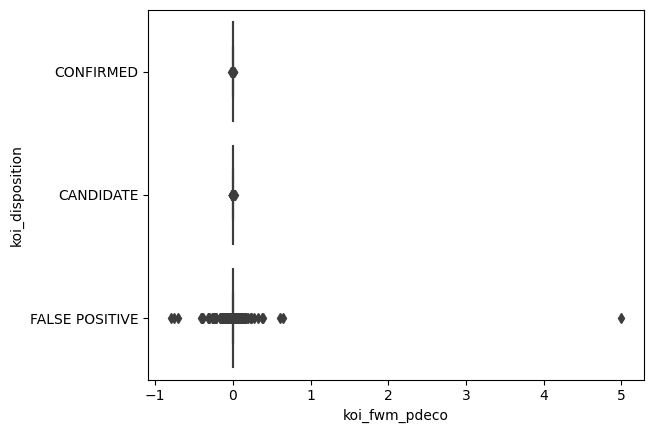

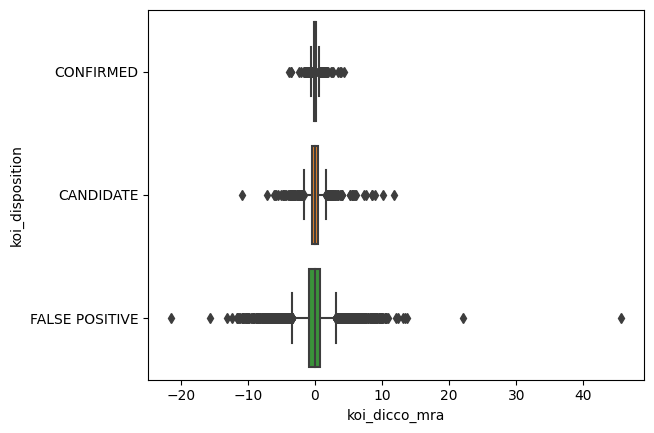

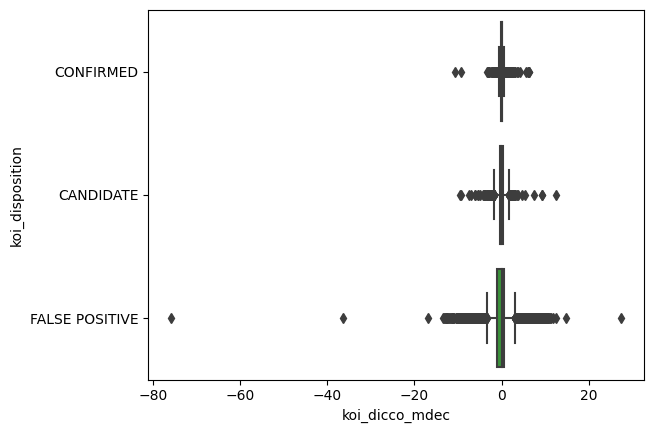

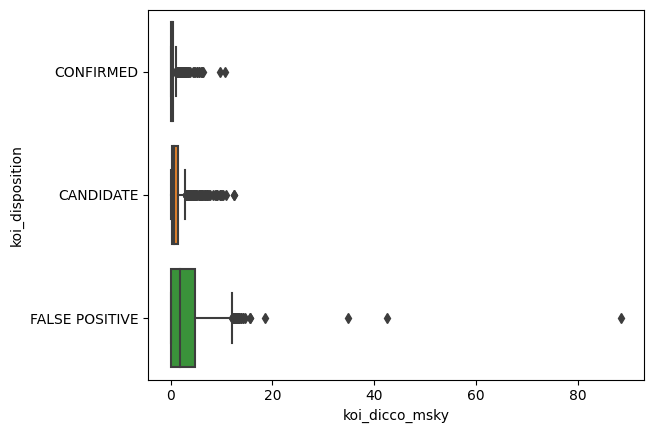

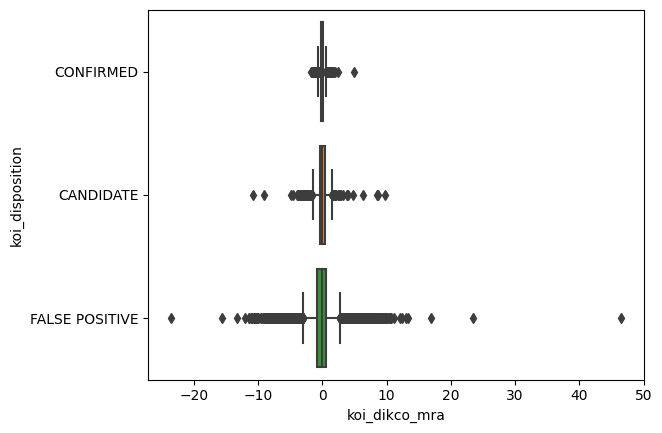

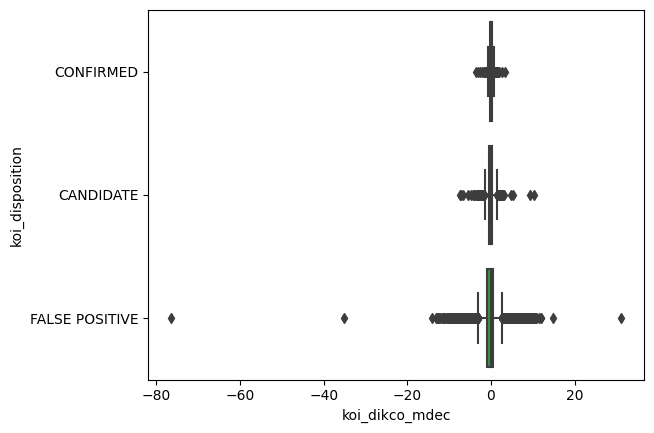

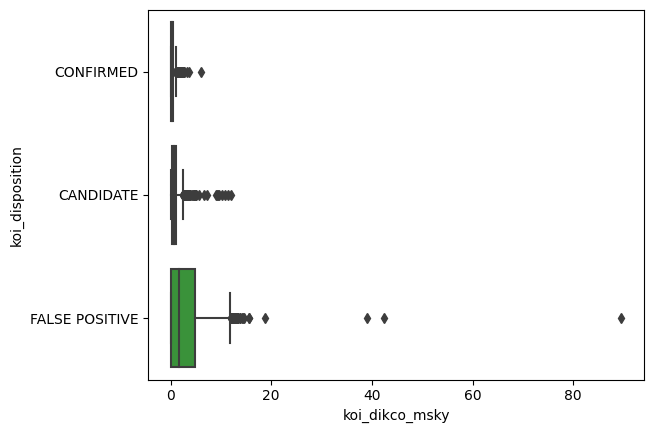

<Figure size 640x480 with 0 Axes>

In [ ]:
headers = list(df_clean.columns.values)[1:]
for title in headers:
  sns.boxplot(data = df_clean, x = title, y='koi_disposition')
  plt.figure()

<Axes: xlabel='koi_steff', ylabel='koi_smass'>

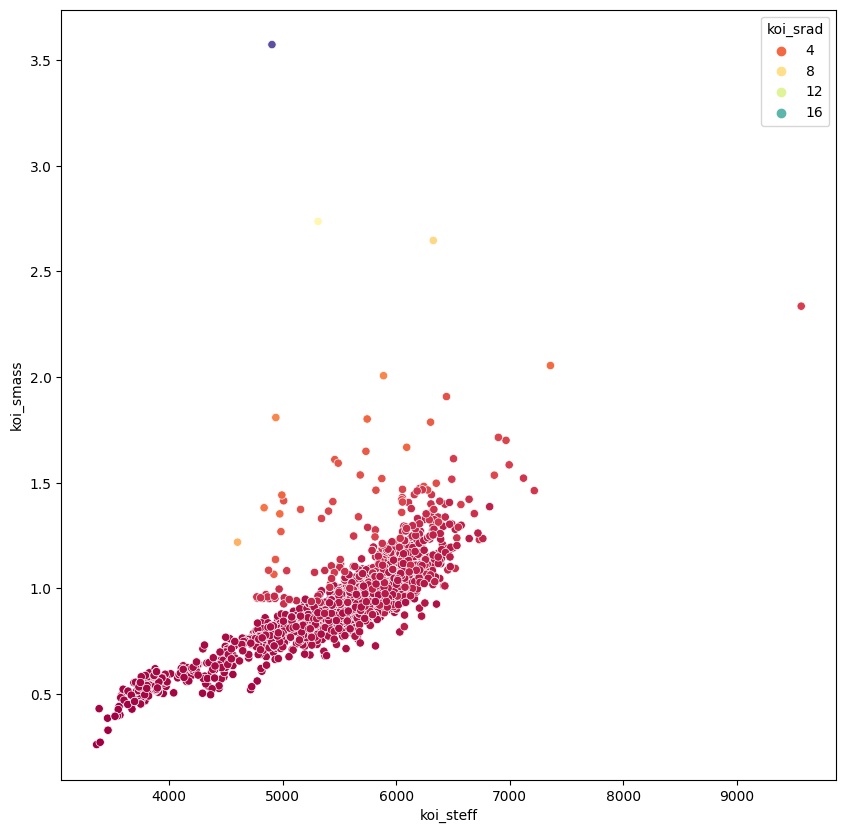

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_clean[df_clean["koi_disposition"]=="CONFIRMED"], x="koi_steff", y="koi_smass", hue="koi_srad", palette=sns.color_palette("Spectral", as_cmap=True))

<Axes: xlabel='koi_steff', ylabel='koi_smass'>

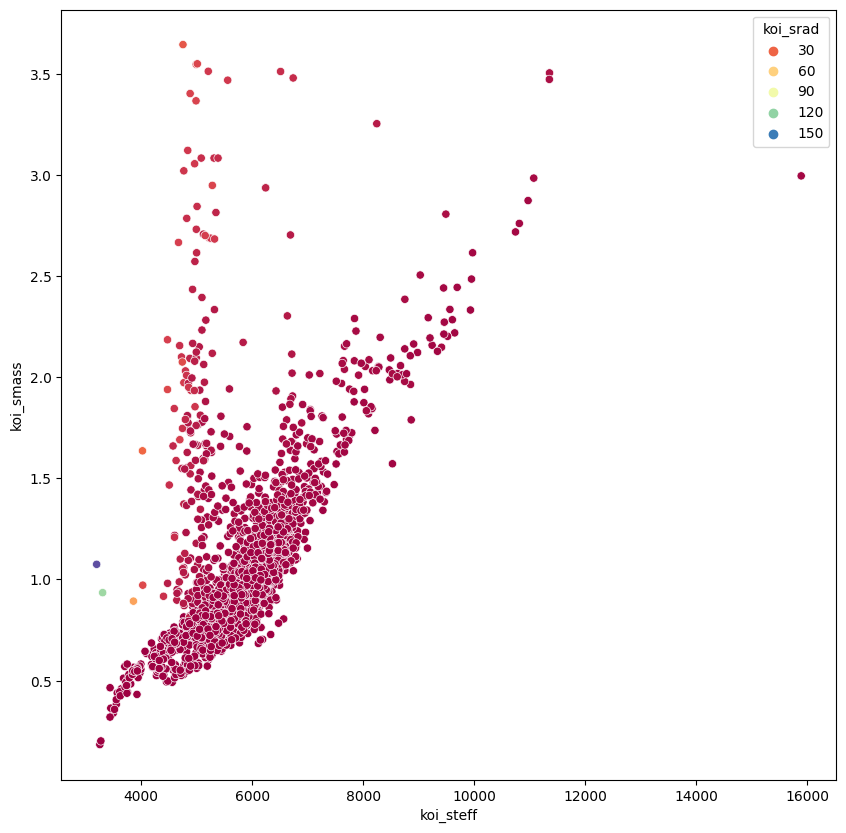

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_clean[df_clean["koi_disposition"]=="FALSE POSITIVE"], x="koi_steff", y="koi_smass", hue="koi_srad", palette=sns.color_palette("Spectral", as_cmap=True))

<Axes: xlabel='koi_steff', ylabel='koi_smass'>

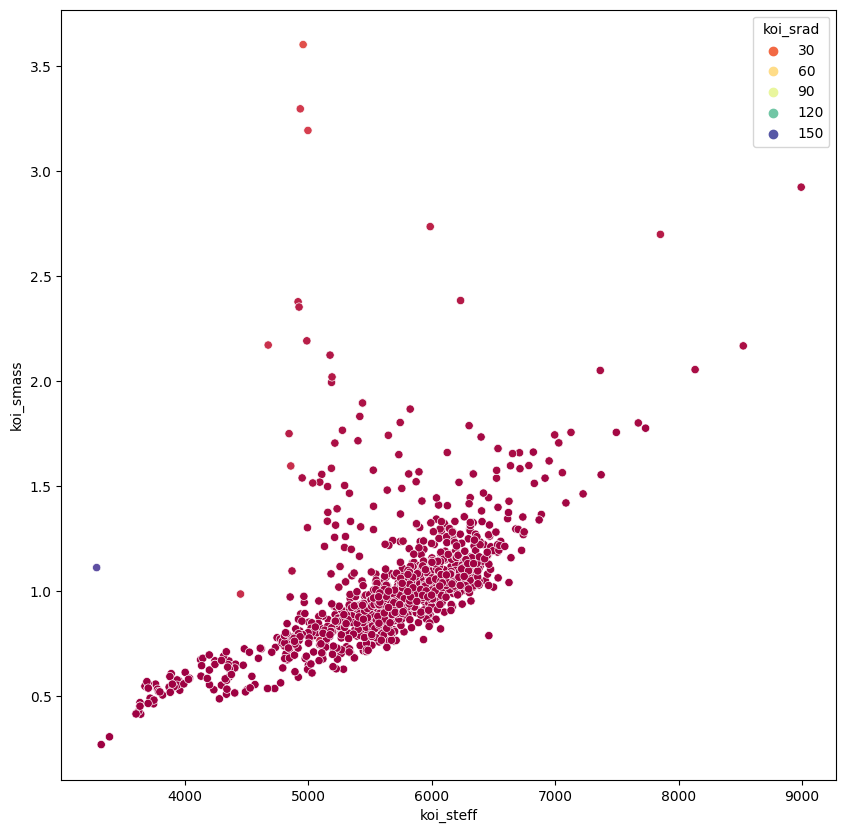

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_clean[df_clean["koi_disposition"]=="CANDIDATE"], x="koi_steff", y="koi_smass", hue="koi_srad", palette=sns.color_palette("Spectral", as_cmap=True))

### Splitting Data & Feature Engineering


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [ ]:
all_x, all_y = df_clean.drop(columns=["koi_disposition"]), df_clean[["koi_disposition"]]

In [ ]:
koi_disposition_classes = df_clean["koi_disposition"].value_counts().index.values

In [ ]:
train_all_x, valid_test_all_x, train_all_y, valid_test_all_y = train_test_split(all_x, all_y, test_size=0.25, random_state=12421)
valid_all_x, test_all_x, valid_all_y, test_all_y = train_test_split(valid_test_all_x, valid_test_all_y, test_size=0.25, random_state=12421)

## Model Selection and Training

### Train Machine Learning Model



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

#### Random Forest

##### Basic Random Forest

In [ ]:
rf_model = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100), n_jobs=-1)
rf_model.fit(train_all_x, train_all_y)

OneVsRestClassifier(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1)

In [ ]:
rf_prediction = rf_model.predict(valid_all_x)
rf_report = classification_report(valid_all_y, rf_prediction)
print(rf_report)

                precision    recall  f1-score   support

     CANDIDATE       0.76      0.57      0.65       251
     CONFIRMED       0.85      0.93      0.89       445
FALSE POSITIVE       0.89      0.93      0.91       557

      accuracy                           0.86      1253
     macro avg       0.83      0.81      0.82      1253
  weighted avg       0.85      0.86      0.85      1253



<Axes: >

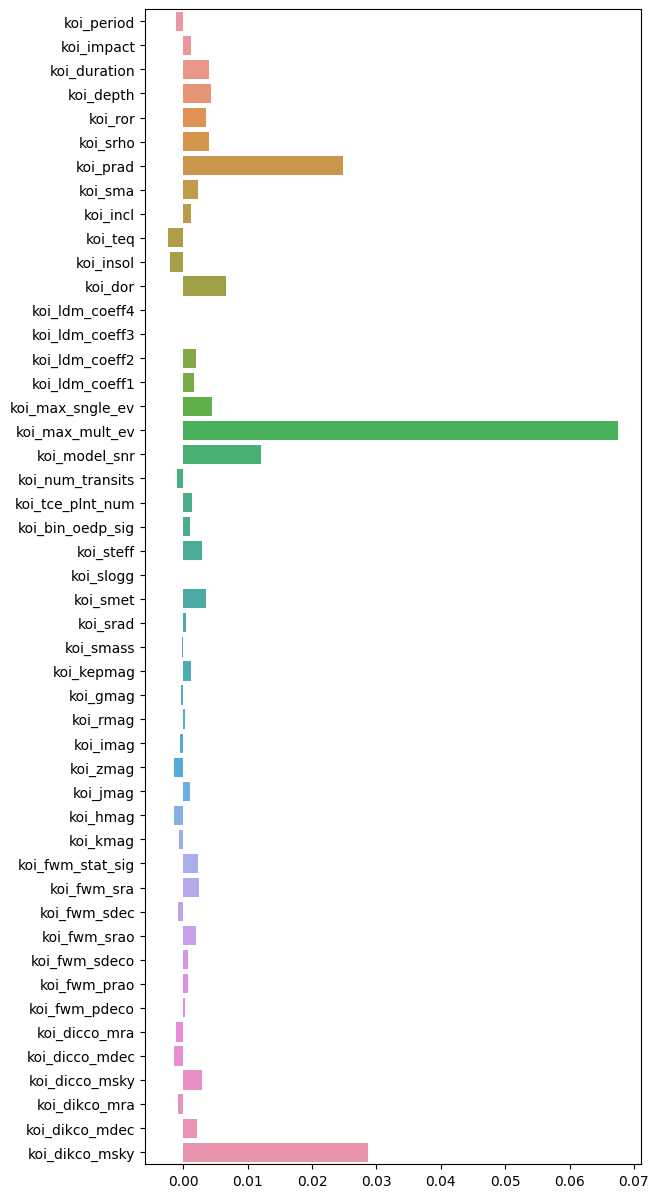

In [ ]:
rf_importance = permutation_importance(
    rf_model, valid_all_x, valid_all_y, n_repeats=10, random_state=12472, n_jobs=-1
)
fig, ax = plt.subplots()
fig.set_figheight(15)
sns.barplot(x=rf_importance.importances_mean, y=np.array(all_x.columns), ax=ax)

##### Random Forest with Feature Importance Adjustments

In [ ]:
importance_measure = np.hstack([np.reshape(rf_importance.importances_mean, (-1,1)), np.arange(0, len(rf_importance.importances_mean)).reshape((-1,1))])
importance_measure = importance_measure[importance_measure[:,0].argsort()][::-1]

In [ ]:
importance_index = importance_measure[:18,1].astype("int")
train_all_x_importance = train_all_x.iloc[:,importance_index]
valid_all_x_importance = valid_all_x.iloc[:,importance_index]
test_all_x_importance = test_all_x.iloc[:,importance_index]

In [ ]:
rf_model = OneVsRestClassifier(RandomForestClassifier(), n_jobs=-1)
rf_model.fit(train_all_x_importance, train_all_y)
rf_prediction = rf_model.predict(valid_all_x_importance)
rf_report_importance = classification_report(valid_all_y, rf_prediction)
print(rf_report_importance)

                precision    recall  f1-score   support

     CANDIDATE       0.76      0.58      0.66       251
     CONFIRMED       0.85      0.93      0.89       445
FALSE POSITIVE       0.90      0.93      0.92       557

      accuracy                           0.86      1253
     macro avg       0.84      0.81      0.82      1253
  weighted avg       0.86      0.86      0.86      1253



#### Gradient Boosting

##### Basic Gradient Boosting

In [ ]:
gb_model = OneVsRestClassifier(GradientBoostingClassifier(), n_jobs=-1)
gb_model.fit(train_all_x, train_all_y)

OneVsRestClassifier(estimator=GradientBoostingClassifier(), n_jobs=-1)

In [ ]:
gb_prediction = gb_model.predict(valid_all_x)
gb_report = classification_report(valid_all_y, gb_prediction)
print(gb_report)

                precision    recall  f1-score   support

     CANDIDATE       0.74      0.61      0.67       251
     CONFIRMED       0.85      0.93      0.89       445
FALSE POSITIVE       0.92      0.91      0.92       557

      accuracy                           0.86      1253
     macro avg       0.83      0.82      0.82      1253
  weighted avg       0.86      0.86      0.86      1253



<Axes: >

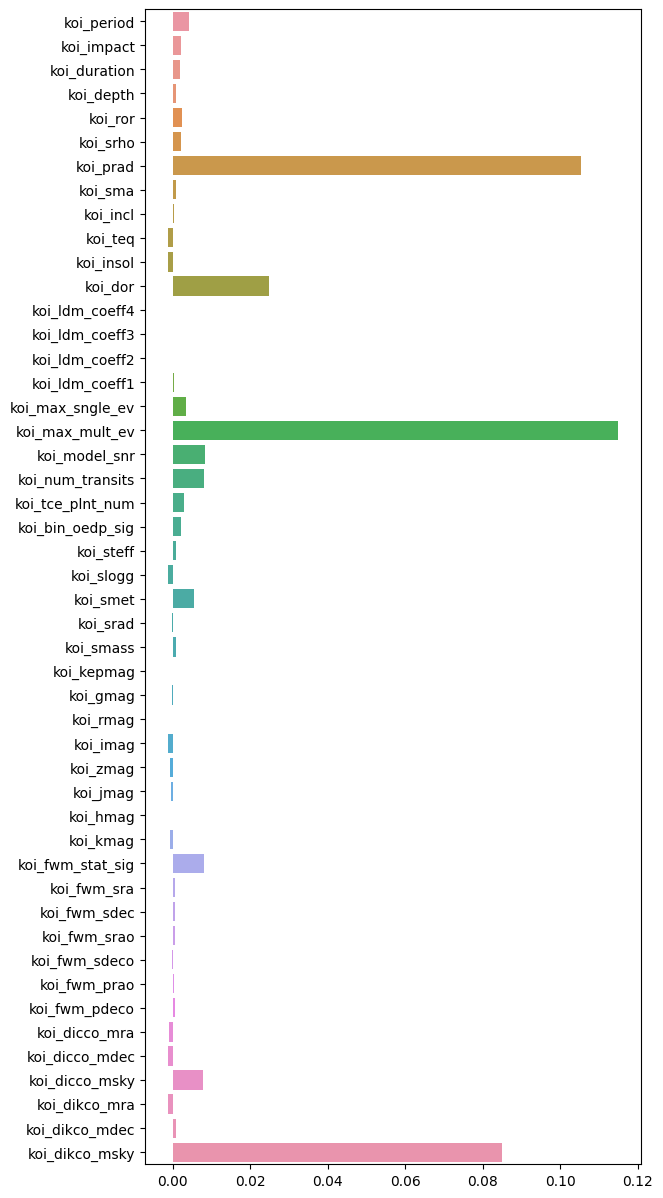

In [ ]:
gb_importance = permutation_importance(
    gb_model, valid_all_x, valid_all_y, n_repeats=10, random_state=12472, n_jobs=-1
)
fig, ax = plt.subplots()
fig.set_figheight(15)
sns.barplot(x=gb_importance.importances_mean, y=np.array(all_x.columns), ax=ax)

##### Gradient Boosting with Feature Importance Adjustments

In [ ]:
importance_measure = np.hstack([np.reshape(gb_importance.importances_mean, (-1,1)), np.arange(0, len(gb_importance.importances_mean)).reshape((-1,1))])
importance_measure = importance_measure[importance_measure[:,0].argsort()][::-1]

In [ ]:
importance_index = importance_measure[:18,1].astype("int")
train_all_x_importance = train_all_x.iloc[:,importance_index]
valid_all_x_importance = valid_all_x.iloc[:,importance_index]
test_all_x_importance = test_all_x.iloc[:,importance_index]

In [ ]:
gb_model = OneVsRestClassifier(GradientBoostingClassifier(), n_jobs=-1)
gb_model.fit(train_all_x_importance, train_all_y)
gb_prediction = gb_model.predict(valid_all_x_importance)
gb_report_importance = classification_report(valid_all_y, gb_prediction)
print(gb_report_importance)

                precision    recall  f1-score   support

     CANDIDATE       0.76      0.61      0.67       251
     CONFIRMED       0.85      0.93      0.89       445
FALSE POSITIVE       0.91      0.92      0.92       557

      accuracy                           0.86      1253
     macro avg       0.84      0.82      0.83      1253
  weighted avg       0.86      0.86      0.86      1253



#### Histogram Gradient Boosting

##### Basic Histogram Gradient Boosting

In [ ]:
hgb1_model = OneVsRestClassifier(HistGradientBoostingClassifier(), n_jobs=-1)
hgb1_model.fit(train_all_x, train_all_y)

OneVsRestClassifier(estimator=HistGradientBoostingClassifier(), n_jobs=-1)

In [ ]:
hgb1_prediction = hgb1_model.predict(valid_all_x)
hgb1_report = classification_report(valid_all_y, hgb1_prediction)
print(hgb1_report)

                precision    recall  f1-score   support

     CANDIDATE       0.73      0.64      0.68       251
     CONFIRMED       0.86      0.92      0.89       445
FALSE POSITIVE       0.92      0.92      0.92       557

      accuracy                           0.86      1253
     macro avg       0.84      0.83      0.83      1253
  weighted avg       0.86      0.86      0.86      1253



<Axes: >

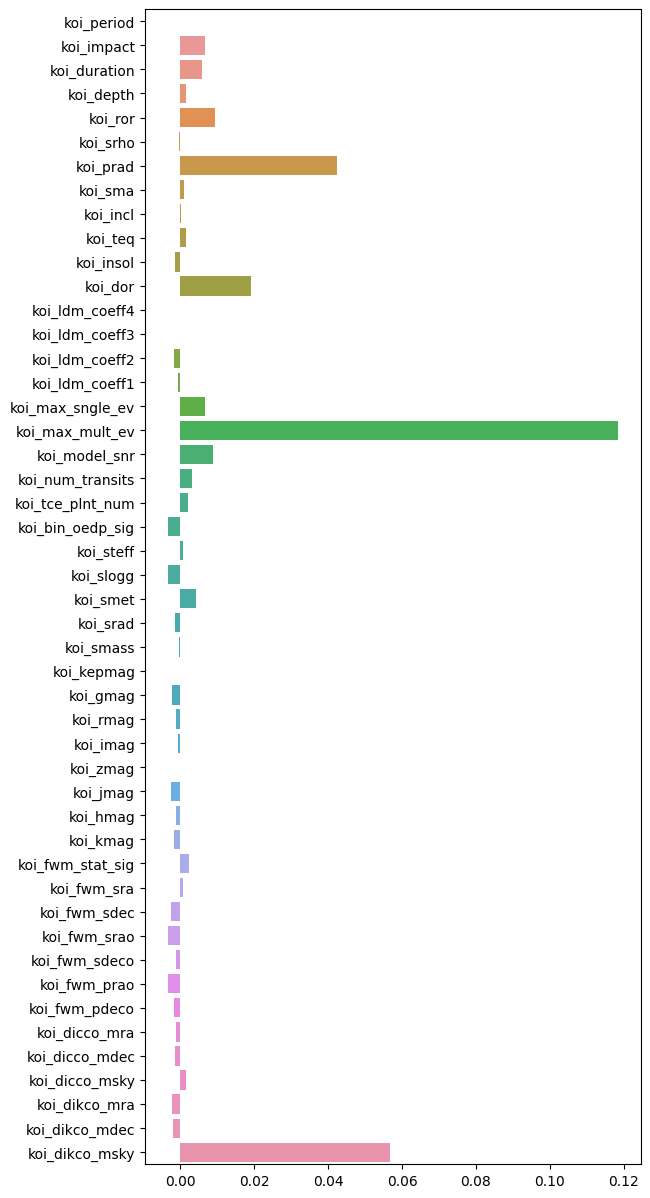

In [ ]:
hgb1_importance = permutation_importance(
    hgb1_model, valid_all_x, valid_all_y, n_repeats=10, random_state=12472, n_jobs=-1
)
fig, ax = plt.subplots()
fig.set_figheight(15)
sns.barplot(x=hgb1_importance.importances_mean, y=np.array(all_x.columns), ax=ax)

##### Histogram Gradient Boosting with Feature Importance Adjustments

In [ ]:
importance_measure = np.hstack([np.reshape(hgb1_importance.importances_mean, (-1,1)), np.arange(0, len(hgb1_importance.importances_mean)).reshape((-1,1))])
importance_measure = importance_measure[importance_measure[:,0].argsort()][::-1]

In [ ]:
importance_index = importance_measure[:18,1].astype("int")
train_all_x_importance = train_all_x.iloc[:,importance_index]
valid_all_x_importance = valid_all_x.iloc[:,importance_index]
test_all_x_importance = test_all_x.iloc[:,importance_index]

In [ ]:
hgb1_model = OneVsRestClassifier(HistGradientBoostingClassifier(), n_jobs=-1)
hgb1_model.fit(train_all_x_importance, train_all_y)
hgb1_prediction = hgb1_model.predict(valid_all_x_importance)
hgb1_report_importance = classification_report(valid_all_y, hgb1_prediction)
print(hgb1_report_importance)

                precision    recall  f1-score   support

     CANDIDATE       0.73      0.65      0.69       251
     CONFIRMED       0.86      0.93      0.90       445
FALSE POSITIVE       0.92      0.91      0.92       557

      accuracy                           0.87      1253
     macro avg       0.84      0.83      0.83      1253
  weighted avg       0.86      0.87      0.86      1253



#### Comparison

In [ ]:
compare_df = pd.DataFrame({"Model" : ["RF", "RF", "GB", "GB", "HGB", "HGB"],
                           "Score" : [float(rf_report.split()[12]), float(rf_report_importance.split()[12]),
                                      float(gb_report.split()[12]), float(gb_report_importance.split()[12]),
                                      float(hgb1_report.split()[12]), float(hgb1_report_importance.split()[12])],
                           "Type" : ["Before importance adjustment", "After importance adjustment",
                                     "Before importance adjustment", "After importance adjustment",
                                     "Before importance adjustment", "After importance adjustment"]})

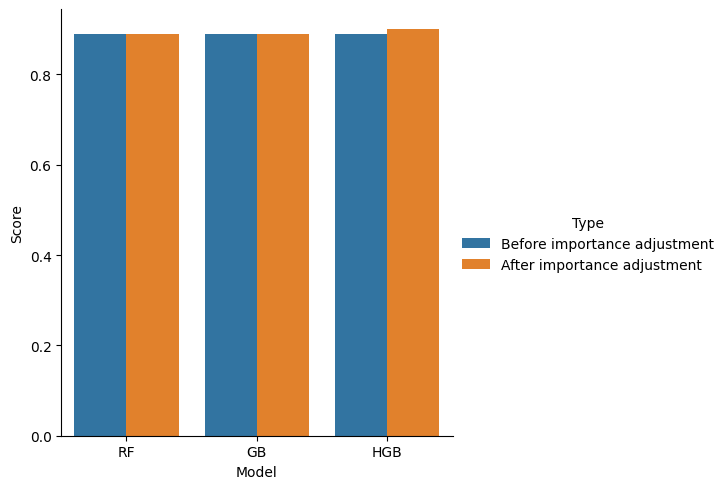

In [ ]:
sns.catplot(data=compare_df, x="Model", y="Score", hue="Type", kind="bar")

#### Scatter plot for histogram gradient boosting results

<Axes: xlabel='Angular offset', ylabel='Distance over star radius'>

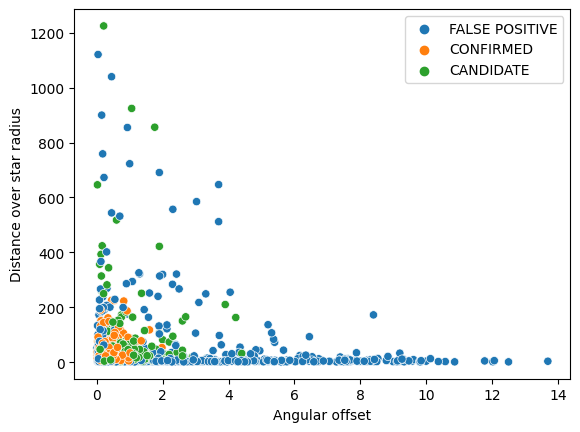

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("Angular offset")
ax.set_ylabel("Distance over star radius")
sns.scatterplot(x=valid_all_x_importance.iloc[:,1], y=valid_all_x_importance.iloc[:,3], hue=hgb1_prediction, ax=ax)

In [ ]:
valid_all_x_importance.columns

Index(['koi_max_mult_ev', 'koi_dikco_msky', 'koi_prad', 'koi_dor', 'koi_ror',
       'koi_model_snr', 'koi_max_sngle_ev', 'koi_impact', 'koi_duration',
       'koi_smet', 'koi_num_transits', 'koi_fwm_stat_sig', 'koi_tce_plnt_num',
       'koi_dicco_msky', 'koi_depth', 'koi_teq', 'koi_sma', 'koi_fwm_sra'],
      dtype='object')

<Axes: xlabel='Number of transits', ylabel='Transit duration'>

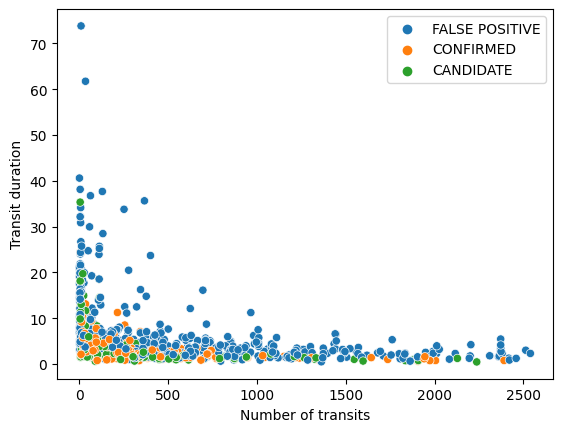

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("Number of transits")
ax.set_ylabel("Transit duration")
sns.scatterplot(x=valid_all_x_importance.loc[:,"koi_num_transits"], y=valid_all_x_importance.loc[:,"koi_duration"], hue=hgb1_prediction, ax=ax)

<Axes: title={'center': 'Prediction results'}, xlabel='Photosphere temperature', ylabel='Stellar mass'>

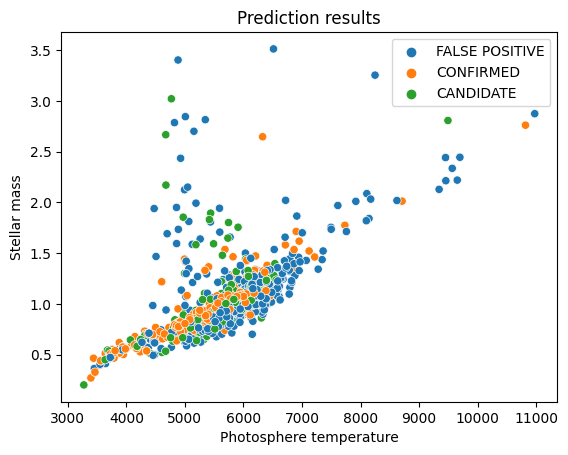

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Prediction results")
ax.set_xlabel("Photosphere temperature")
ax.set_ylabel("Stellar mass")
sns.scatterplot(x=valid_all_x["koi_steff"], y=valid_all_x["koi_smass"], hue=hgb1_prediction)

<Axes: title={'center': 'Actual data'}, xlabel='Photosphere temperature', ylabel='Stellar mass'>

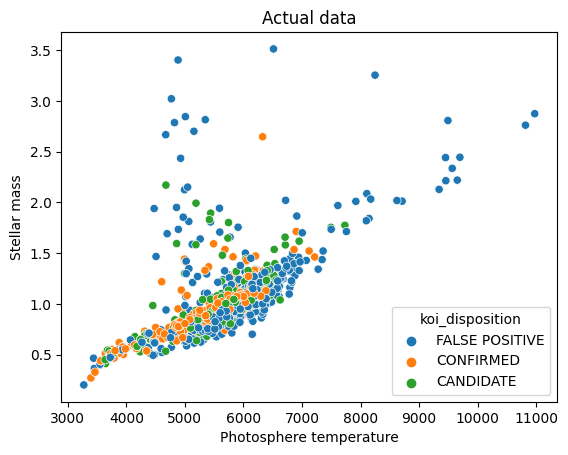

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Actual data")
ax.set_xlabel("Photosphere temperature")
ax.set_ylabel("Stellar mass")
sns.scatterplot(x=valid_all_x["koi_steff"], y=valid_all_x["koi_smass"], hue=valid_all_y["koi_disposition"], ax=ax)

## Hyperparameter Tuning

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [ ]:
distributions = {
    "estimator__learning_rate" : uniform(0.01, 0.98),
    "estimator__max_iter" : randint(50, 300),
    "estimator__max_depth" : randint(20, 200),
    "estimator__max_leaf_nodes" : randint(20, 100),
    "estimator__l2_regularization" : uniform(0, 40),
    "estimator__max_bins" : randint(100, 255)
}

# 15919
# 15944
# 15979
# 99699

hgb1_hpt = RandomizedSearchCV(hgb1_model, distributions, n_jobs=-1, n_iter=1, random_state=99699)
hgb1_hpt.fit(train_all_x_importance, train_all_y)
hgb1_hpt_prediction = hgb1_hpt.predict(valid_all_x_importance)
hgb1_hpt_report = classification_report(valid_all_y, hgb1_hpt_prediction, output_dict=True)
print(f"F1: ", hgb1_hpt_report["accuracy"])
print(hgb1_hpt.best_params_)
print("==================")

F1:  0.87390263367917
{'estimator__l2_regularization': 12.976495073173634, 'estimator__learning_rate': 0.47376839673796955, 'estimator__max_bins': 111, 'estimator__max_depth': 105, 'estimator__max_iter': 120, 'estimator__max_leaf_nodes': 75}


In [ ]:
hgb1_prediction = hgb1_hpt.predict(test_all_x_importance)
hgb1_report_importance = classification_report(test_all_y, hgb1_prediction)
print(hgb1_report_importance)

                precision    recall  f1-score   support

     CANDIDATE       0.83      0.67      0.74        73
     CONFIRMED       0.89      0.96      0.92       158
FALSE POSITIVE       0.93      0.94      0.93       187

      accuracy                           0.90       418
     macro avg       0.88      0.86      0.87       418
  weighted avg       0.90      0.90      0.90       418



In [ ]:
hgb1_prediction = hgb1_model.predict(test_all_x_importance)
hgb1_report = classification_report(test_all_y, hgb1_prediction)
print(hgb1_report)

                precision    recall  f1-score   support

     CANDIDATE       0.79      0.60      0.68        73
     CONFIRMED       0.85      0.92      0.89       158
FALSE POSITIVE       0.93      0.95      0.94       187

      accuracy                           0.88       418
     macro avg       0.86      0.83      0.84       418
  weighted avg       0.88      0.88      0.88       418



<Axes: xlabel='Condition', ylabel='Score'>

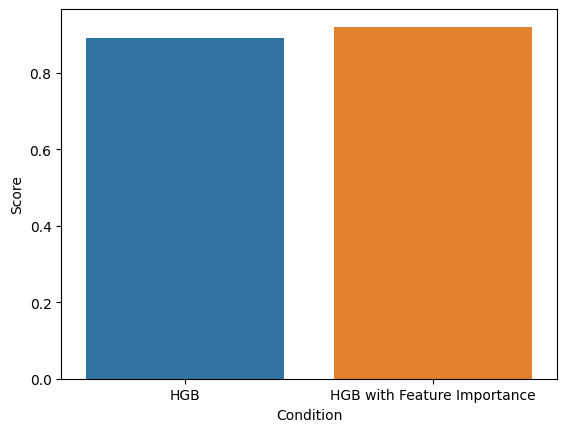

In [ ]:
hgb_compare = pd.DataFrame({"Condition": ["HGB", "HGB with Feature Importance"], "Score":[float(hgb1_report.split()[12]), float(hgb1_report_importance.split()[12])]})
fig, ax = plt.subplots()
sns.barplot(data=hgb_compare, x="Condition", y="Score")